# Import the Libraries and Assign the Variables

In [6]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import sklearn 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

## Import Dataset

In [7]:
df=pd.read_csv("HousingData.csv")
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,NaN,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


In [8]:
df.isnull().sum()

CRIM       20
ZN         20
INDUS      20
CHAS       20
NOX         0
RM          0
AGE        20
DIS         0
RAD         0
TAX         0
PTRATIO     0
B           0
LSTAT      20
MEDV        0
dtype: int64

In [9]:
df.duplicated().sum()

np.int64(0)

In [10]:
df.fillna(df.mean(),inplace=True) 

## Seperation of independent and dependent data

In [11]:
df.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MEDV'],
      dtype='object')

In [12]:
x=df.iloc[:,:-1]    
x

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.200000,4.0900,1,296,15.3,396.90,4.980000
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.900000,4.9671,2,242,17.8,396.90,9.140000
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.100000,4.9671,2,242,17.8,392.83,4.030000
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.800000,6.0622,3,222,18.7,394.63,2.940000
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.200000,6.0622,3,222,18.7,396.90,12.715432
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.100000,2.4786,1,273,21.0,391.99,12.715432
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.700000,2.2875,1,273,21.0,396.90,9.080000
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.000000,2.1675,1,273,21.0,396.90,5.640000
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.300000,2.3889,1,273,21.0,393.45,6.480000


In [13]:
y=df["MEDV"]        
y

0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
       ... 
501    22.4
502    20.6
503    23.9
504    22.0
505    11.9
Name: MEDV, Length: 506, dtype: float64

In [14]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,shuffle=True,random_state=50)


In [15]:
x_train


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
449,7.52601,0.0,18.10,0.0,0.713,6.417,98.3,2.1850,24,666,20.2,304.21,19.31
374,18.49820,0.0,18.10,0.0,0.668,4.138,100.0,1.1370,24,666,20.2,396.90,37.97
253,0.36894,22.0,5.86,0.0,0.431,8.259,8.4,8.9067,7,330,19.1,396.90,3.54
402,9.59571,0.0,18.10,0.0,0.693,6.404,100.0,1.6390,24,666,20.2,376.11,20.31
417,25.94060,0.0,18.10,0.0,0.679,5.304,89.1,1.6475,24,666,20.2,127.36,26.64
...,...,...,...,...,...,...,...,...,...,...,...,...,...
289,0.04297,52.5,5.32,0.0,0.405,6.565,22.9,7.3172,6,293,16.6,371.72,9.51
109,0.26363,0.0,8.56,0.0,0.520,6.229,91.2,2.5451,5,384,20.9,391.23,15.55
395,8.71675,0.0,18.10,0.0,0.693,6.471,98.8,1.7257,24,666,20.2,391.98,17.12
480,5.82401,0.0,18.10,0.0,0.532,6.242,64.7,3.4242,24,666,20.2,396.90,10.74


In [16]:
x_test

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
365,4.55587,0.0,18.10,0.0,0.718,3.561,87.9,1.6132,24,666,20.2,354.70,7.120000
313,0.26938,0.0,9.90,0.0,0.544,6.266,82.8,3.2628,4,304,18.4,393.39,7.900000
461,3.69311,0.0,18.10,0.0,0.713,6.376,88.4,2.5671,24,666,20.2,391.43,14.650000
158,1.34284,0.0,19.58,0.0,0.605,6.066,100.0,1.7573,5,403,14.7,353.89,6.430000
333,0.05083,0.0,5.19,0.0,0.515,6.316,38.1,6.4584,5,224,20.2,389.71,5.680000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
304,0.05515,33.0,2.18,0.0,0.472,7.236,41.1,4.0220,7,222,18.4,393.68,6.930000
421,7.02259,0.0,18.10,0.0,0.718,6.006,95.3,1.8746,24,666,20.2,319.98,15.700000
497,0.26838,0.0,9.69,0.0,0.585,5.794,70.6,2.8927,6,391,19.2,396.90,14.100000
65,0.03584,80.0,3.37,0.0,0.398,6.290,17.8,6.6115,4,337,16.1,396.90,4.670000


In [17]:
y_train

449    13.0
374    13.8
253    42.8
402    12.1
417    10.4
       ... 
289    24.8
109    19.4
395    13.1
480    23.0
176    23.2
Name: MEDV, Length: 404, dtype: float64

In [18]:
y_test

365    27.5
313    21.6
461    17.7
158    24.3
333    22.2
       ... 
304    36.1
421    14.2
497    18.3
65     23.5
87     22.2
Name: MEDV, Length: 102, dtype: float64

In [19]:
x_train.shape,x_test.shape

((404, 13), (102, 13))

In [20]:
y_train.shape,y_test.shape

((404,), (102,))

## Model Training:- Linear Regression

In [21]:
model=LinearRegression()              
model.fit(x_train,y_train) 

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [22]:
y_train_pred=model.predict(x_train)   #seen
y_test_pred=model.predict(x_test)     #unseen

In [23]:
x_train[:3]

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
449,7.52601,0.0,18.10,0.0,0.713,6.417,98.3,2.1850,24,666,20.2,304.21,19.31
374,18.49820,0.0,18.10,0.0,0.668,4.138,100.0,1.1370,24,666,20.2,396.90,37.97
253,0.36894,22.0,5.86,0.0,0.431,8.259,8.4,8.9067,7,330,19.1,396.90,3.54


In [24]:
y_train[:3]

449    13.0
374    13.8
253    42.8
Name: MEDV, dtype: float64

In [25]:
y_train_pred[:3]

array([16.95073307,  1.01770412, 31.06983249])

In [26]:
x_test[:3]

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
365,4.55587,0.0,18.1,0.0,0.718,3.561,87.9,1.6132,24,666,20.2,354.70,7.12
313,0.26938,0.0,9.9,0.0,0.544,6.266,82.8,3.2628,4,304,18.4,393.39,7.90
461,3.69311,0.0,18.1,0.0,0.713,6.376,88.4,2.5671,24,666,20.2,391.43,14.65


In [27]:
y_test[:3]

365    27.5
313    21.6
461    17.7
Name: MEDV, dtype: float64

In [28]:
y_test_pred[:3]

array([10.50949698, 25.28704979, 19.29463719])

## Model Evaluation

In [29]:
def training_eval(actual,predicted):
   mse=mean_squared_error(actual,predicted)
   rmse=np.sqrt(mean_squared_error(actual,predicted))
   mae=mean_absolute_error(actual,predicted)
   r2=r2_score(actual,predicted)

   print(f'MSE:{mse}')
   print(f'RMSE:{rmse}') 
   print(f'MAE:{mae}')
   print(f'R2 Score:{r2}') 

   plt.scatter(actual,predicted,color="r")
   plt.plot([actual.min(),actual.max()],[actual.min(),actual.max()],lw=4,ls="--")
   plt.title("Best fit line")
   plt.xlabel("Actual Price")
   plt.ylabel("Predicted Price")
   plt.show()

MSE:21.920064449362133
RMSE:4.68188684713355
MAE:3.3001747872604223
R2 Score:0.7460140868382529


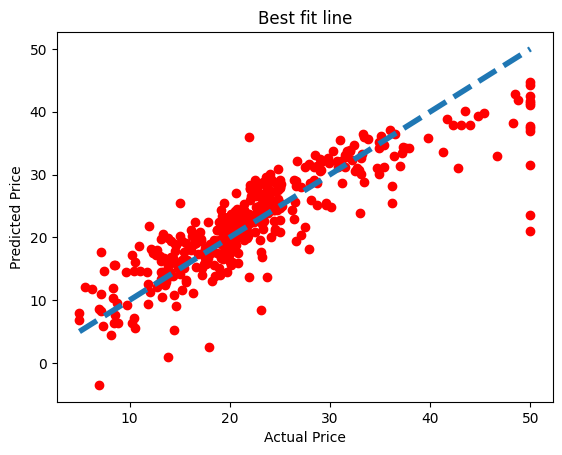

In [30]:
training_eval(y_train,y_train_pred)

MSE:27.848831688106742
RMSE:5.277199227630765
MAE:3.44837158817403
R2 Score:0.6378359939473397


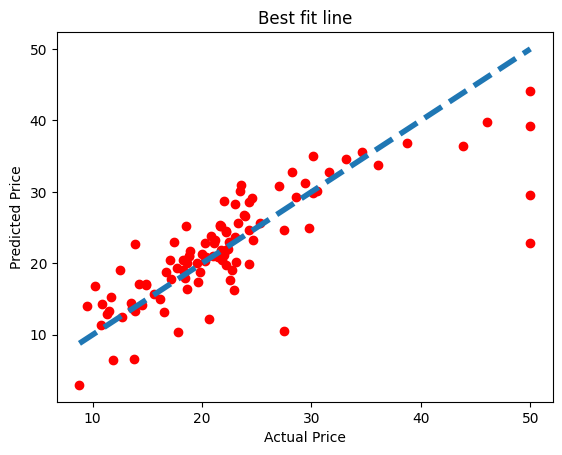

In [31]:
training_eval(y_test,y_test_pred)

## Model Training:- XGboost regression

In [32]:
xgb = XGBRegressor()                     #linear regression using pre-defined polynomial features 
xgb.fit(x_train, y_train)

,objective,'reg:squarederror'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,None
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,None


### Model prediction

In [33]:
y_train_pred_xgb=xgb.predict(x_train)
y_test_pred_xgb=xgb.predict(x_test)

### TRAINING DATA PREDICTION

In [34]:
x_train[:3]

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
449,7.52601,0.0,18.10,0.0,0.713,6.417,98.3,2.1850,24,666,20.2,304.21,19.31
374,18.49820,0.0,18.10,0.0,0.668,4.138,100.0,1.1370,24,666,20.2,396.90,37.97
253,0.36894,22.0,5.86,0.0,0.431,8.259,8.4,8.9067,7,330,19.1,396.90,3.54


In [35]:
y_train[:3]

449    13.0
374    13.8
253    42.8
Name: MEDV, dtype: float64

In [36]:
y_train_pred_xgb[:3]

array([13.006148, 13.80563 , 42.77998 ], dtype=float32)

### TEST DATA PREDICTION

In [37]:
x_test[:3]

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
365,4.55587,0.0,18.1,0.0,0.718,3.561,87.9,1.6132,24,666,20.2,354.70,7.12
313,0.26938,0.0,9.9,0.0,0.544,6.266,82.8,3.2628,4,304,18.4,393.39,7.90
461,3.69311,0.0,18.1,0.0,0.713,6.376,88.4,2.5671,24,666,20.2,391.43,14.65


In [38]:
y_test[:3]

365    27.5
313    21.6
461    17.7
Name: MEDV, dtype: float64

In [39]:
y_test_pred_xgb[:3]

array([22.864164, 21.795422, 20.83736 ], dtype=float32)

### Model Evaluation

In [40]:
def training_eval(actual,predicted):
   mse=mean_squared_error(actual,predicted)
   rmse=np.sqrt(mean_squared_error(actual,predicted))
   mae=mean_absolute_error(actual,predicted)
   r2=r2_score(actual,predicted)

   print(f'MSE:{mse}')
   print(f'RMSE:{rmse}') 
   print(f'MAE:{mae}')
   print(f'R2 Score:{r2}') 

   plt.scatter(actual,predicted,color="r")
   plt.plot([actual.min(),actual.max()],[actual.min(),actual.max()],lw=4,ls="--")
   plt.title("Best fit line")
   plt.xlabel("Actual Price")
   plt.ylabel("Predicted Price")
   plt.show()

MSE:0.0003642483377724473
RMSE:0.01908529113669601
MAE:0.013352407087193856
R2 Score:0.9999957794856443


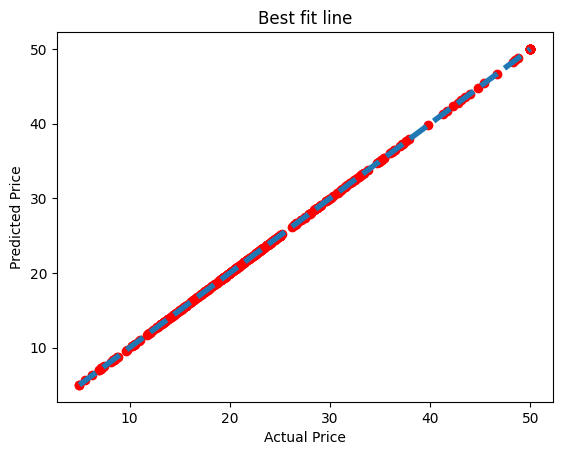

In [41]:
training_eval(y_train,y_train_pred_xgb)

MSE:9.411491266342281
RMSE:3.0678153898731066
MAE:2.0701983582739736
R2 Score:0.877606952488287


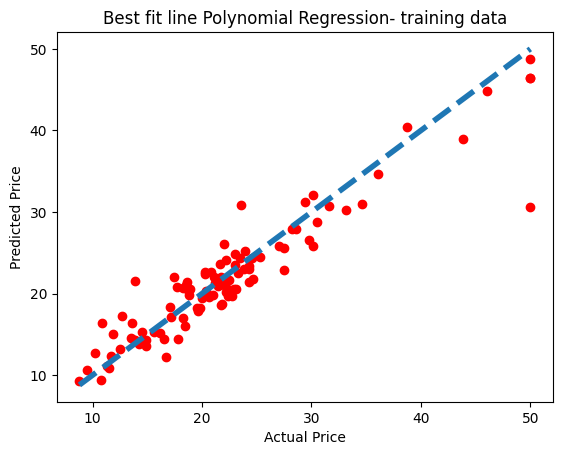

In [52]:
training_eval(y_test,y_test_pred_xgb)

## Model training:- random forest

In [43]:
random = RandomForestRegressor()
random.fit(x_train, y_train)

,n_estimators,100
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [44]:
y_train_pred_random=random.predict(x_train)
y_test_pred_random=random.predict(x_test)

In [45]:
def training_eval(actual,predicted):
   mse=mean_squared_error(actual,predicted)
   rmse=np.sqrt(mean_squared_error(actual,predicted))
   mae=mean_absolute_error(actual,predicted)
   r2=r2_score(actual,predicted)

   print(f'MSE:{mse}')
   print(f'RMSE:{rmse}') 
   print(f'MAE:{mae}')
   print(f'R2 Score:{r2}') 

   plt.scatter(actual,predicted,color="r")
   plt.plot([actual.min(),actual.max()],[actual.min(),actual.max()],lw=4,ls="--")
   plt.title("Best fit line Polynomial Regression- training data")
   plt.xlabel("Actual Price")
   plt.ylabel("Predicted Price")
   plt.show()

MSE:2.3024901955445545
RMSE:1.5173958598680024
MAE:0.9448143564356428
R2 Score:0.9733212429091024


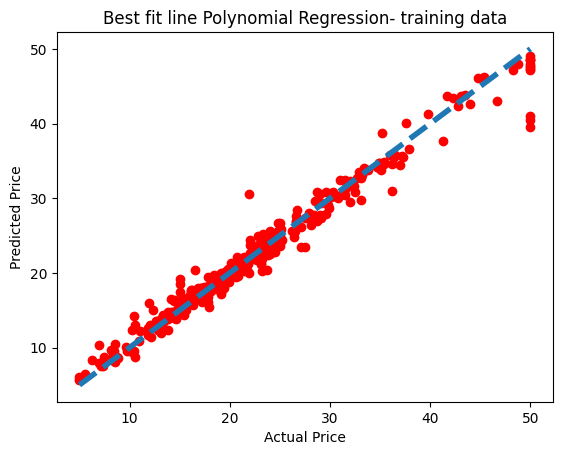

In [46]:
training_eval(y_train,y_train_pred_random)

MSE:9.37438475490196
RMSE:3.061761707726772
MAE:2.154127450980392
R2 Score:0.8780895092786175


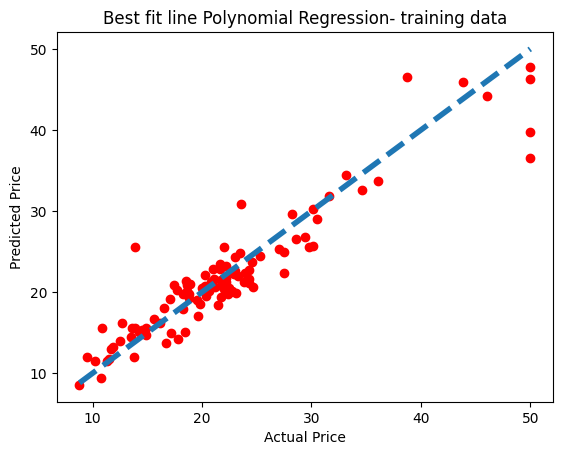

In [47]:
training_eval(y_test,y_test_pred_random)

## Random Forest algorithm can be selected for hyperparametertuning based on its  performance

#### Model Training:- GridsearchCV on Random forest model

In [48]:
# Hyperparameter tuning for Random Forest
param_grid = {
    'n_estimators': [100, 200, 300],  # Number of trees
    'max_depth': [10, 20, None],  # Tree depth
    'min_samples_split': [2, 5, 10],  # Min samples to split a node
    'min_samples_leaf': [1, 2, 4]  # Min samples per leaf
}

rf = RandomForestRegressor(random_state=42)
grid_search = GridSearchCV(rf, param_grid, cv=5, scoring='r2', n_jobs=-1, verbose=2)
grid_search.fit(x_train, y_train)

best_rf = grid_search.best_estimator_
print("Best Parameters:", grid_search.best_params_)

Fitting 5 folds for each of 81 candidates, totalling 405 fits
Best Parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 300}


In [49]:
best_rf.fit(x_train, y_train)

,n_estimators,300
,criterion,'squared_error'
,max_depth,None
,min_samples_split,5
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


Train MAE: 1.0792229437549983
Train MSE: 2.960819785983163
Train RMSE: 1.7207032823770527
Train R² Score: 0.9656932342152769


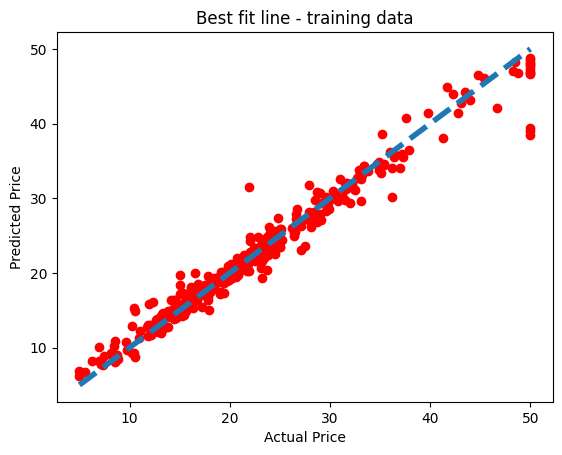

In [50]:
y_train_pred = best_rf.predict(x_train)
train_r2 = r2_score(y_train, y_train_pred)
mean_train_mae = mean_absolute_error(y_train, y_train_pred)
mean_train_mse = mean_squared_error(y_train, y_train_pred)
mean_train_rmse = np.sqrt(mean_train_mse)
print("Train MAE:", mean_train_mae)
print("Train MSE:", mean_train_mse)
print("Train RMSE:", mean_train_rmse)
print("Train R² Score:", train_r2)

plt.scatter(y_train, y_train_pred, color='r')
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], lw=4, ls='--')
plt.title("Best fit line - training data")
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.show()

Test MAE: 2.2112277449402424
Test MSE: 10.91367678210678
Test RMSE: 3.303585443439715
Test R² Score: 0.8580715719625793


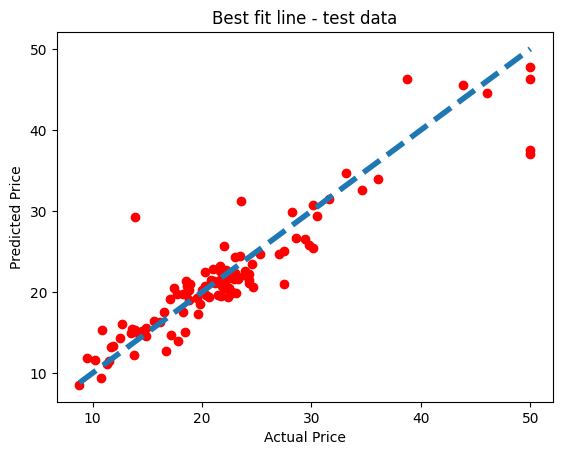

In [51]:
y_test_pred = best_rf.predict(x_test)
test_r2 = r2_score(y_test, y_test_pred)
mean_test_mae = mean_absolute_error(y_test, y_test_pred)
mean_test_mse = mean_squared_error(y_test, y_test_pred)
mean_test_rmse = np.sqrt(mean_test_mse)
print("Test MAE:", mean_test_mae)
print("Test MSE:", mean_test_mse)
print("Test RMSE:", mean_test_rmse)
print("Test R² Score:", test_r2)

plt.scatter(y_test, y_test_pred, color="r")
plt.plot([y_test.min(), y_test.max()],[y_test.min(), y_test.max()], lw=4, ls="--")
plt.title("Best fit line - test data")
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.show()

*Conclusion:* The Random Forest model performed well on the test data with an R² score of **0.858**, meaning it explains **85.8%** of the variance in the target variable.

###  Model Evaluation Metrics (Random Forest on Test Data)

- **Mean Absolute Error (MAE):** 2.21  
- **Mean Squared Error (MSE):** 10.91  
- **Root Mean Squared Error (RMSE):** 3.30  
- **R² Score:** 0.858 — the model explains **85.8%** of the variance in the target variable.